In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.sandbox.stats.runs import mcnemar
%matplotlib inline

In [2]:
df = pd.read_csv('no-show-issue-300k.csv')

In [3]:
# assigns boolean values to status messages
d = {'No-Show': False, 'Show-Up': True}

# converts status messages to boolean values
df.Status = df.Status.map(d)

In [4]:
# converts waiting time positive integers
df.AwaitingTime = df.AwaitingTime.abs()

In [5]:
df.head(10)

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,True,0,0,0,0,0,0,0,0,29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,True,0,0,0,0,0,0,0,0,1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,True,0,0,0,0,0,0,0,0,1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,True,0,0,0,0,0,0,0,1,15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,True,0,0,0,0,0,0,0,1,6
5,5,F,2014-06-17T06:47:27Z,2014-07-22T00:00:00Z,Tuesday,False,0,0,0,0,0,0,0,1,35
6,46,F,2015-06-19T19:53:58Z,2015-07-07T00:00:00Z,Tuesday,True,0,0,0,0,0,0,0,1,18
7,4,F,2015-08-07T08:19:19Z,2015-08-21T00:00:00Z,Friday,True,0,0,0,0,0,1,0,1,14
8,20,F,2014-10-14T11:46:36Z,2014-10-28T00:00:00Z,Tuesday,True,0,0,0,0,0,0,0,0,14
9,51,F,2014-06-13T07:50:43Z,2014-06-17T00:00:00Z,Tuesday,True,1,0,1,0,0,0,0,1,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
Age                        300000 non-null int64
Gender                     300000 non-null object
AppointmentRegistration    300000 non-null object
ApointmentData             300000 non-null object
DayOfTheWeek               300000 non-null object
Status                     300000 non-null bool
Diabetes                   300000 non-null int64
Alcoolism                  300000 non-null int64
HiperTension               300000 non-null int64
Handcap                    300000 non-null int64
Smokes                     300000 non-null int64
Scholarship                300000 non-null int64
Tuberculosis               300000 non-null int64
Sms_Reminder               300000 non-null int64
AwaitingTime               300000 non-null int64
dtypes: bool(1), int64(10), object(4)
memory usage: 27.8+ MB


In [7]:
df.Sms_Reminder.value_counts()

1    170654
0    128547
2       799
Name: Sms_Reminder, dtype: int64

In [14]:
# remove outlier values
df = df.loc[(df.Sms_Reminder < 2)]

### The Problem

How do we decrease the amount of no-show appointments for this doctor's office?

In [9]:
# rate of no-shows to people who showed up

made_appointments = len(df[df.Status == True])
missed_appointments = len(df[df.Status == False])

print('Appointments made:', made_appointments)
print('Appointments missed:', missed_appointments)
print('ratio', missed_appointments/ (made_appointments + missed_appointments))

Appointments made: 208738
Appointments missed: 90463
ratio 0.3023485884071243


30% of appointments for this office are missed.

Missed appointments are problematic for a couple of reasons.

Firstly, we care about the well-being and health of our patients. Whenever a person misses out on a potential meeting, the less likely we are to find and diagnose potentially damaging health issues. 

Secondly, missed appointments lead to a lack of revenue on our end because we miss out on co-pays.

### The Potential Solution

Increasing the rate at which we remind patients about appointments via SMS will decrease the number of no-show appointments.

In [10]:
# rate of those who received sms reminders and those that did not

sms_reminder_y = len(df[df.Sms_Reminder == 1])
sms_reminder_n = len(df[df.Sms_Reminder == 0])

print('SMS reminded sample size:', sms_reminder_y)
print('Not SMS reminded sample size:', sms_reminder_n)
print('SMS proportion:', df.Sms_Reminder.mean())

SMS reminded sample size: 170654
Not SMS reminded sample size: 128547
SMS proportion: 0.570365740756


Currently, only about 57% of our patients receive the SMS reminder about an appointment.

In [11]:
# What is the rate that patients show up based on whether or not they
# receive a text message or not?

print(df[df.Sms_Reminder == 1].Status.mean())
print(df[df.Sms_Reminder == 0].Status.mean())

0.697938518874
0.697270259127


In [28]:
yy = len(df[(df.Status == True) & (df.Sms_Reminder == 1)])
yn = len(df[(df.Status == True) & (df.Sms_Reminder == 0)])
ny = len(df[(df.Status == False) & (df.Sms_Reminder == 1)])
nn = len(df[(df.Status == False) & (df.Sms_Reminder == 0)])

In [32]:
obs = [[yy, yn],
       [ny, nn]]
mcnemar(obs)

(51548, 0.0)

The differences in status between groups that received a text message and groups that did not receive a text message reminder does not seem very significant. The show-up rate is only slightly higher for patients that received a text message than those that did not.

There may be some other factors at play concerning the significance of the data.

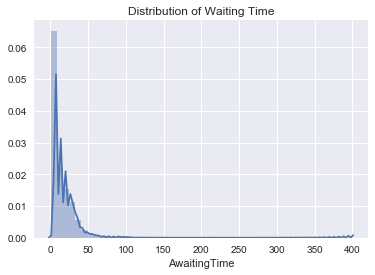

In [34]:
ax = sns.distplot(df.AwaitingTime)
plt.title('Distribution of Waiting Time')

Many patients wait less than 75 days between setting an appointment and actually going to the clinic. Narrowing the data to only include patients waiting 75 days or less will provide data for the most prolific days a patient must wait.

In [35]:
# creates data frame for waiting time of less than 76 days
df2 = df.loc[(df.AwaitingTime < 76)]

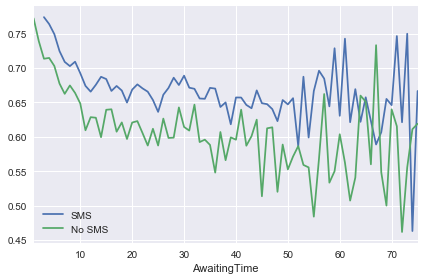

In [36]:
fig = df2[df2.Sms_Reminder==1][
    ['AwaitingTime', 'Status']].groupby('AwaitingTime').mean().plot()
df2[df2.Sms_Reminder==0][
    ['AwaitingTime', 'Status']].groupby('AwaitingTime').mean().plot(ax=fig)
plt.legend(['SMS', 'No SMS'])
plt.tight_layout()
plt.show()

The longer the duration of waiting time, the more unpredictable the status results become.

However, within the first 75 days, show-up rates are greater for the group that receives a text message reminder than those that don't.

The difference could be a result of time in conjunction with a text message reminder but the status rates are significantly lower for the reminded group.

### The Method of Testing the Solution

Increase the number of patients that receive SMS notifications prior to an appointment to 80%. Currently, 57% of patients receive the reminder. 

The variable of interest is the status (show-up or no-show) in groups that received an SMS reminder and those that did not.

This is an A/B manipulation where a text message reminder is sent or not sent.

We will compute the status rates for 75 days before the study and compare it to the status rates between those who received a reminder after 75 days during the study. I am choosing 75 days as the benchmark because most of our patients are waiting less than 75 days between setting an appointment and arriving at the clinic.

If the no-show rates in the next two months decrease by 5% with the increased number of patients getting text messages, conclude that increasing SMS reminders is effective and send text messages to more, willing patients with cellphones.

If the no-show rates do not decrease within the 75-day period, observe for 75 more days. If the no-show rates still do not increase, revert back to the old method of assigning SMS reminders to patients.